# HW 5 - Alex Humble

# Dimensionality Reduction and Clustering

In [1]:
import sklearn

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


Importing the data can be tricky. I originally had scikit-learn version 18.1 installed on my computer and it was nearly impossible to get the data. It is important to check the versions of your modules and ensure that they are up-to-date in order to optimize your model.

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

The images are 784 pixels in total. The dimensions are 28 pixels in height and 28 pixels in width. Pixels are assigned a value that corresponds to the light in each pixel; a higher number means the pixel is darker and the inverse holds for a lighter picture. These values are integers on a scale from 0 to 784

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data
Here we will use seaborn to visualize the data. The site says they are handwritten numbers imported into the dataset. Seaborn will help us see what it is that we will be modeling.

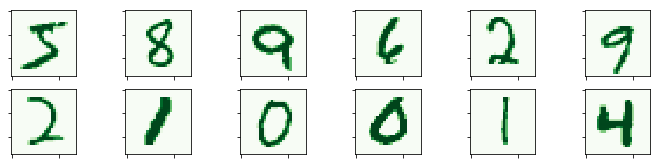

In [5]:
graph = plt.figure(figsize=(12,7))
for ii in range(12):
    ax = graph.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2303
    plt.imshow(X[ii*2303].reshape((28,28)), cmap='Greens')

## Principle Component Analysis

### Part A: Components

In [6]:
#This shows the size of our images
X.shape

(70000, 784)

The images have 784 dimensions. That is a lot! We will use PCA to reduce dimensionality. This will come at a cost. Dropping dimensions means we will be reducing the amount of information fed into the model

In [7]:
#To get a feel for how PCA performs, We will start by seeing how much of the variance is explained in a model with only 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2dim = pca.fit_transform(X)
print("Shape {}:".format(X_2dim.shape))
print("Variance Explained by Component: {}".format(pca.explained_variance_ratio_))
print("Total Variance Explained: {}".format(np.sum(pca.explained_variance_ratio_)))

Shape (70000, 2):
Variance Explained by Component: [0.09746116 0.07155445]
Total Variance Explained: 0.16901560507290397


In [8]:
#Now we will try with slightly more components and see how they compare
pca = PCA(n_components=5)
X_2dim = pca.fit_transform(X)
print("Shape {}:".format(X_2dim.shape))
print("Variance Explained by Component: {}".format(pca.explained_variance_ratio_))
print("Total Variance Explained: {}".format(np.sum(pca.explained_variance_ratio_)))

Shape (70000, 5):
Variance Explained by Component: [0.09746116 0.07155445 0.06149531 0.05403385 0.04888934]
Total Variance Explained: 0.3334340968212968


PCA is very effective at getting rid of the curse of dimensionality. Dropping from 784 dimensions to 2 dimensions is no small feat; however, we would like to choose the amount of components that provides the optimal tradeoff between explaining the total variance and dimensionality. The best way to do this is by graphing the total variance explained against components added to the PCA model. With this visualization, we can use the elbow method to identify the optimal amount of components

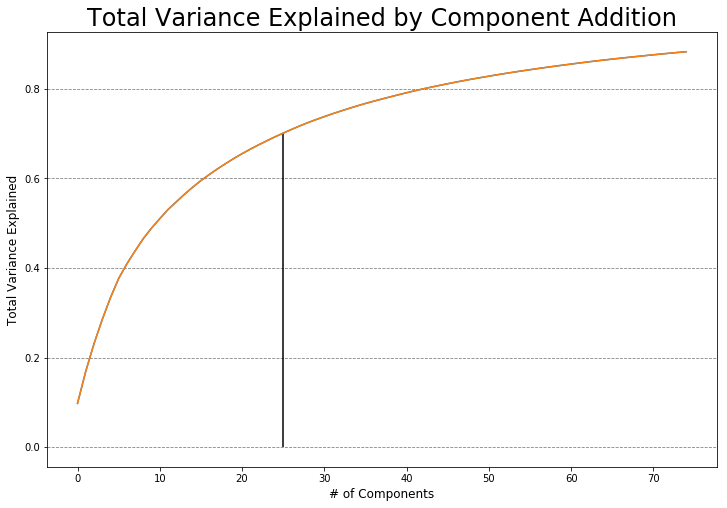

In [9]:
#100 components is the max for this plot and was selected somewhat arbitrarily
pca = PCA(n_components=75)
running_pca = pca.fit_transform(X)

#We are going to calculate the variance explained at each step to monitor our progression
cumulative = np.cumsum(pca.explained_variance_ratio_)
f, ax = plt.subplots(figsize = (12,8))
plt.plot(range(len(cumulative)),cumulative)
plt.ylabel("Total Variance Explained",fontsize = 12)
plt.xlabel("# of Components",fontsize = 12)
plt.title("Total Variance Explained by Component Addition",fontsize = 24)
ax.yaxis.grid(color='gray', linestyle='dashed')
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[25],x=25)

After looking at the graph, there is a diminishing marginal amount of total variance explained as we add components to the model. After initially visualizing the graph without the vertical line, I diagnosed the elbow to be at 25 components as from there on the marginal amount of total variance explained gained by adding components seems to outweigh the damage done to the model by increasing dimensionality.

### Part B: Plot the first two componenets. 
#### Do you notice any trends? What is the plot showing us?

In [10]:
#Allows us to look at just the first two components
pca = PCA(n_components=2)
PCA2 = pca.fit_transform(X)

#Pandas is ideal for plotting
data = pd.DataFrame(PCA2,columns=['C1','C2'])

Text(0.5, 1.0, 'Separation With Two Components')

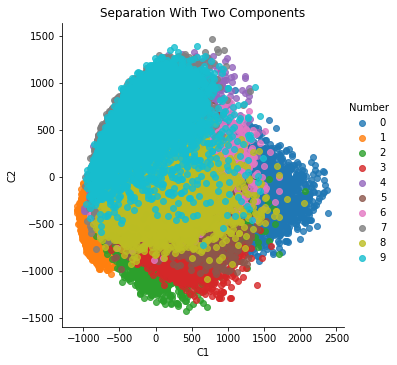

In [11]:
data['Number'] = y
sns.lmplot(x='C1', y='C2', data=data,hue='Number',fit_reg=False)
plt.title("Separation With Two Components")

Using 2 components explains about 17% of the total variation in the data as seen in our 2-component PCA model a few lines up. While that number does not seem like very much, it is clear that some trends are starting to emerge already even with only two components.

Notice how numbers 2,3,5 and 8 are paired together  at the bottom of the plot. These numbers are more curved than numbers like 1 and 7 and are therefore better separated in the model. Looking at the distribution of 1's and 7's it is clear that more dimensions are needed in order to truly explain the variation in the data. 

###  Part C: 
#### Why would you use PCA? What is it doing? And what are the drawbacks?

As mentioned above, PCA is extremely helpful in cases of high dimensionality. It does a great job at reducing the issues caused by dimensionality by dropping dimensions and keeping those that do the best job of explaining the total variance.

PCA chooses the first component that explains the highest amount of total variance within the data. From there it takes a component orthogonal to the first component in order to ensure that the two components are not correlated with one another. This ensures that with each component, it is capturing the highest amount of total variance explained possible. This means that the first component will contain the most total variance explained and then the second and se forth.

The drawbacks to PCA aren't as easy to explain. First, as we drop dimensionality within our data, it becomes more difficult to interpret what the remaining results actually mean. Second, PCA uses euclidian distance in its calculation of the orthogonal component which means that it won't work as well with categorical data.

### Part D: 
### Plot some of the images, then compress them using PCA and plot again. How does it look?



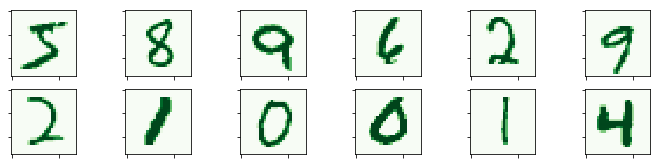

In [12]:
graph = plt.figure(figsize=(12,7))
for ii in range(12):
    ax = graph.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2303
    plt.imshow(X[ii*2303].reshape((28,28)), cmap='Greens')

Again here is the original look at the numbers with all of the dimensions included

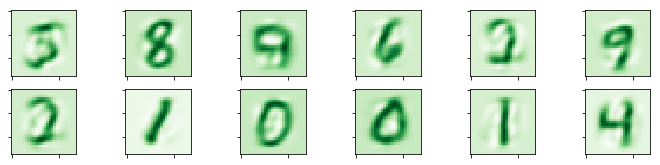

In [13]:
#PCA with 25 components
pca = PCA(n_components=25)
X_26dim = pca.fit_transform(X)

#Revert back to original space
transform = pca.inverse_transform(X_26dim)

graph = plt.figure(figsize=(12,7))
for ii in range(12):
    ax = graph.add_subplot(5,6,ii+1)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #Pick random numbers by multiplying entry by 2303
    plt.imshow(transform[ii*2303].reshape((28,28)), cmap='Greens')

With only 25 dimensions of our 784(!!!) We are still able to get a pretty decent look at the numbers. While the pictures are still somewhat blurry, it is clear that we have been able to sacrifice the majority of our dimensions while still keeping a vital amount of information for our model. 

# 2)
### Use t-SNE to plot the first two components



In [14]:
from sklearn.manifold import TSNE
#Again use 2 components for HW purpose
pca = PCA(n_components=25)
X_26dim = pca.fit_transform(X)

#Random sample of 10,000 points
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#Fits data to TSNE model
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=2000)
res = tsne.fit_transform(X_26dim[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 2.638s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 196.398133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.604836
[t-SNE] KL divergence after 1000 iterations: 1.880080


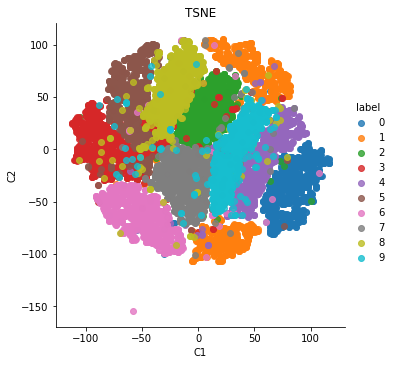

In [15]:
df_tsne = pd.DataFrame(res, columns=['C1', 'C2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='C1', y='C2', data=df_tsne, hue='label', fit_reg=False)
ax = plt.gca()
ax.set_title("TSNE", fontsize = 12)
plt.show()

TSNE does a better job of separating data than PCA. The PCA plot was a pretty large cluster in the middle. It is clear that TSNE has done more separation; however, the clustering of like numbers together is still apparent. The 8's and the 3's are stacked on top of each other as are other combination of aesthetically similar numbers

#### b.  How robust is it to changes in perplexity?

In [17]:
tsne = TSNE(n_components=2, verbose=0, perplexity=35, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with Perplexity of 35')

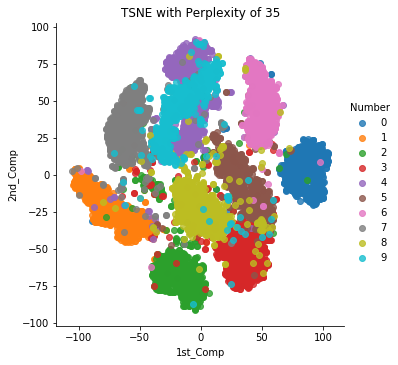

In [18]:
#Perplexity 35 plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with Perplexity of 35")

The higher the perplexity of the model, the more separation you see in the data. It is clear between looking at the plot with a complexity of five and the plot with a complexity of 35, that the higher complexity adds separation to the data. On the side of caution, it appears as though the data is less robust when the perplexity is higher.

### C.
#### How robust is it to different learning rate and number of iterations?

Now that we have seen the effect of changing the perplexity, we can hold the perplexity constant and look at the effect of changing the amount of iterations and then also changing the learning rate.

In [20]:
#Set number of iterations to 250
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=250, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

Text(0.5, 1.0, 'TSNE with 250 Iterations')

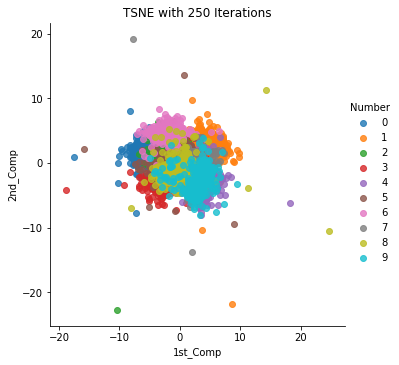

In [21]:
#Lower n_iter plot
df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with 250 Iterations")

Text(0.5, 1.0, 'TSNE with 750 Iterations')

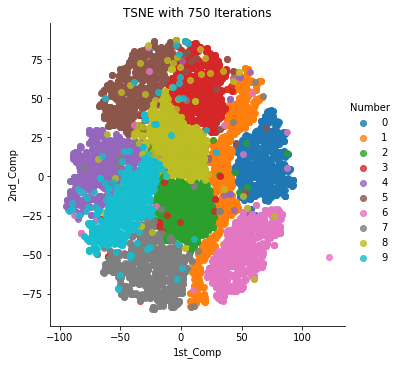

In [22]:
#Set number of iterations to 750
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=750, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with 750 Iterations")

Text(0.5, 1.0, 'TSNE with 750 Iterations')

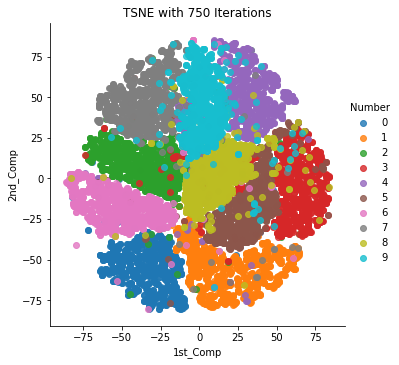

In [23]:
#Set learning rate 200
tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=750, learning_rate=200)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("TSNE with 750 Iterations")

The model appears to be pretty robust to different learning rates and iterations. The plots look very similar.

## 3. Perform k-means clustering
### a.

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score

In [25]:
#There are 10 numbers in our data set so setting k to 10 is really intuitive
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
sk_clusters = kmeans.predict(X)

### B. Evaluating the clustering



I will evaluate the clustering through three different models:
* t-SNE Silhoutte Score: The silhoutte score should be close to the true score
* Adjusted Rand Score: Gives a similarity measure between the clusterings. (-1 - 1)
* Completeness Score: the more data points of the same class are clustered together, the higher the score (0-1)

In [26]:
from sklearn.metrics import silhouette_score
cluster_tsne = pd.DataFrame(res, columns=['Component 1', 'Component 2'])
print('t-SNE Silhouette Score:')
print(silhouette_score(cluster_tsne[['Component 1', 'Component 2']], sk_clusters[rows[:n_select]], metric='euclidean'))
print('True Clustering Silhouette Score:')
print(silhouette_score(df_tsne[['1st_Comp', '2nd_Comp']], y[rows[:n_select]], metric='euclidean'))

t-SNE Silhouette Score:
0.050633296
True Clustering Silhouette Score:
0.24125312


In [27]:
print("Adjusted Rand Score: {}".format(adjusted_rand_score(y, sk_clusters)))

Adjusted Rand Score: 0.3656013578266986


In [28]:
print("Completeness Score: {}".format(completeness_score(y, sk_clusters)))

Completeness Score: 0.5036726006398478


It appears as though the completeness score does the best amongst the three models

### C. Visualize your clusters using t-sne



We can use the original t-SNE model from before, but we must insert number labels from k-means clustering 

In [29]:
#Reverting to original model
tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=1000, learning_rate=2000)
results = tsne.fit_transform(X_26dim[rows[:n_select],:])

df_tsne = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
df_tsne['Number'] = y[rows[:n_select]]

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 3.548s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 270.798674
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.669968
[t-SNE] KL divergence after 1000 iterations: 1.743875


Text(0.5, 1.0, 'Truth')

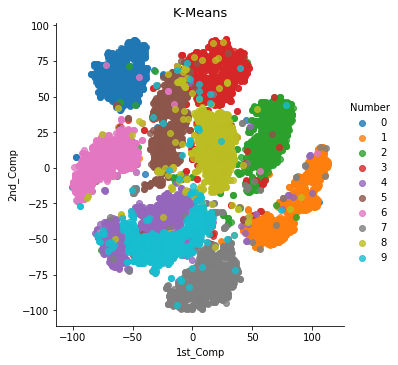

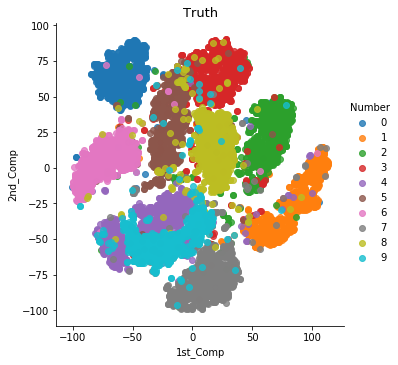

In [30]:
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
#Use the K-means numbers instead of the SKLearn numbers from before
df_kmeans['Number'] = y[rows[:n_select]]

#Plot K-Means
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("K-Means",fontsize=13)
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_tsne, hue='Number', fit_reg=False)
plt.title("Truth",fontsize=13)

The K-Means appeared to struggle more with like numbers such as 3 and 8 and 1 and 7

## D. Scale the Data



In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [32]:
scale.fit(X)
scale = scale.transform(X)

In [33]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Completeness Score: 0.44181486323119523


Text(0.5, 1.0, 'Scaled K-Means')

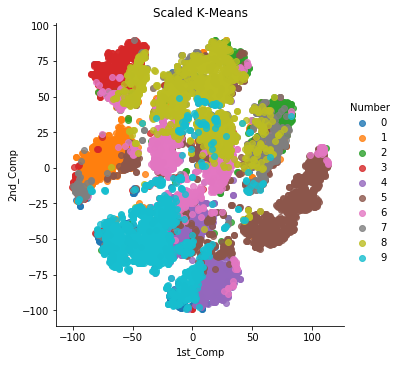

In [34]:
sk_clusters = kmeans.predict(scale)
# K-Means Clustering
df_kmeans = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
#Use the K-means numbers instead of the SKLearn numbers from before
df_kmeans['Number'] = sk_clusters[rows[:n_select]]

print("Completeness Score: {}".format(completeness_score(y,sk_clusters)))

#Plot K-Means
sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df_kmeans,hue='Number',fit_reg=False)
plt.title("Scaled K-Means",fontsize=12)

It appears as though scaling made it more difficult for the model to observe distance between the clusters, which makes sense.

### E. Check Robustness

In [35]:
def robust_check(size):
    for num in range(4):
        np.random.seed(seed=num)
        rows = np.arange(70000)
        np.random.shuffle(rows)
        n_select=size
        tsne = TSNE(n_components=2, verbose=0, perplexity=5, n_iter=1000, learning_rate=500)
        results = tsne.fit_transform(X_26dim[rows[:n_select],:])
        kmeanss = kmeans.fit(X[rows[:n_select],:])
        k_clusters = kmeanss.predict(X)
        df = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
        df['Number'] = k_clusters[rows[:n_select]]
        sns.lmplot(x='1st_Comp', y='2nd_Comp', data=df,hue='Number',fit_reg=False)
        plt.title("Random Sample of size {}".format(size))

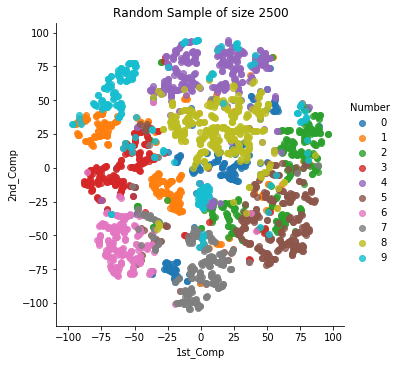

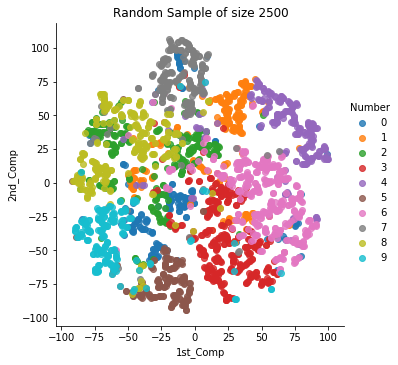

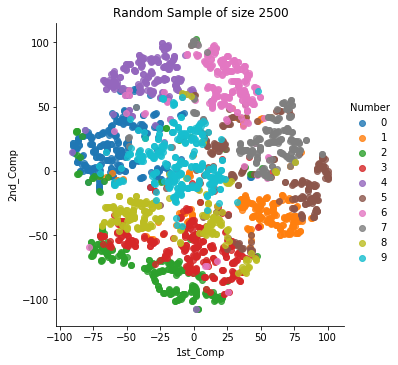

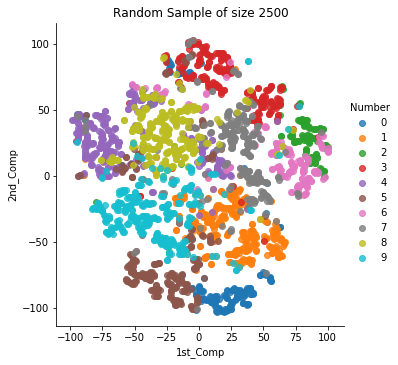

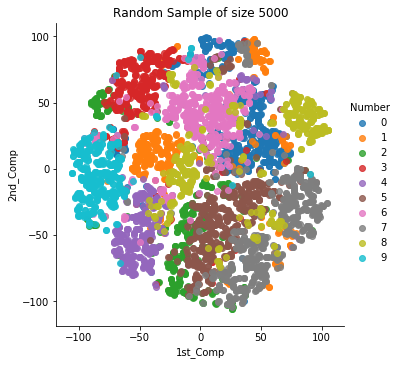

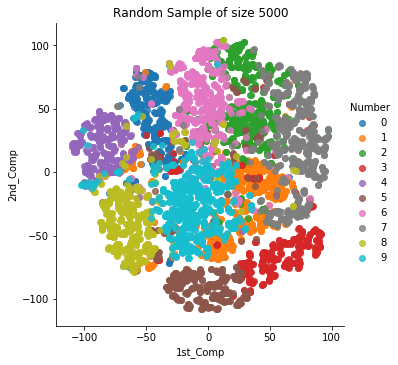

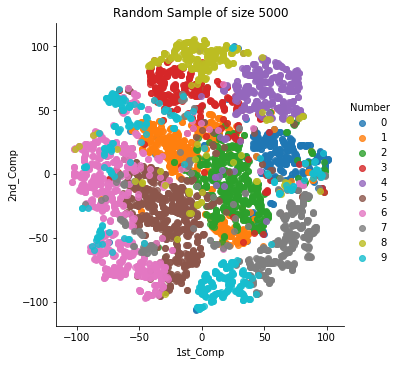

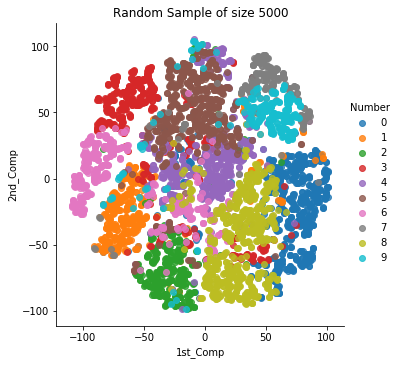

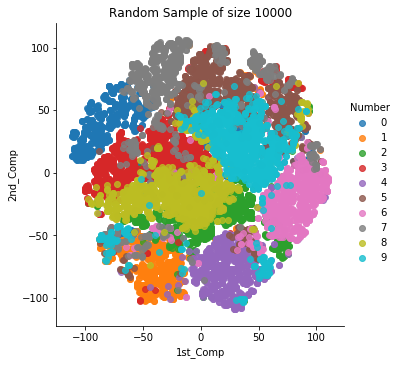

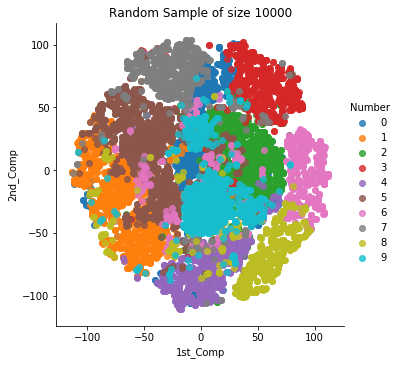

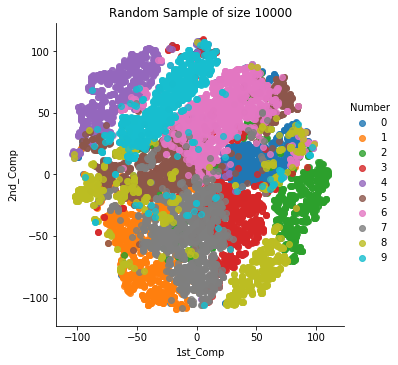

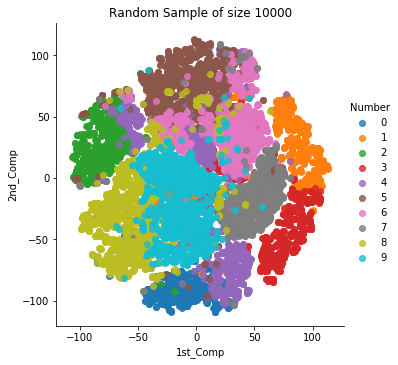

In [36]:
for size in [2500,5000,10000]:
    robust_check(size)

Our sample seems to not be robust if the sample changes or the sample size changes.

## Hierarchical Clustering

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

### A. Plot your dendrogram


Text(0, 0.5, 'Hierarchy Level')

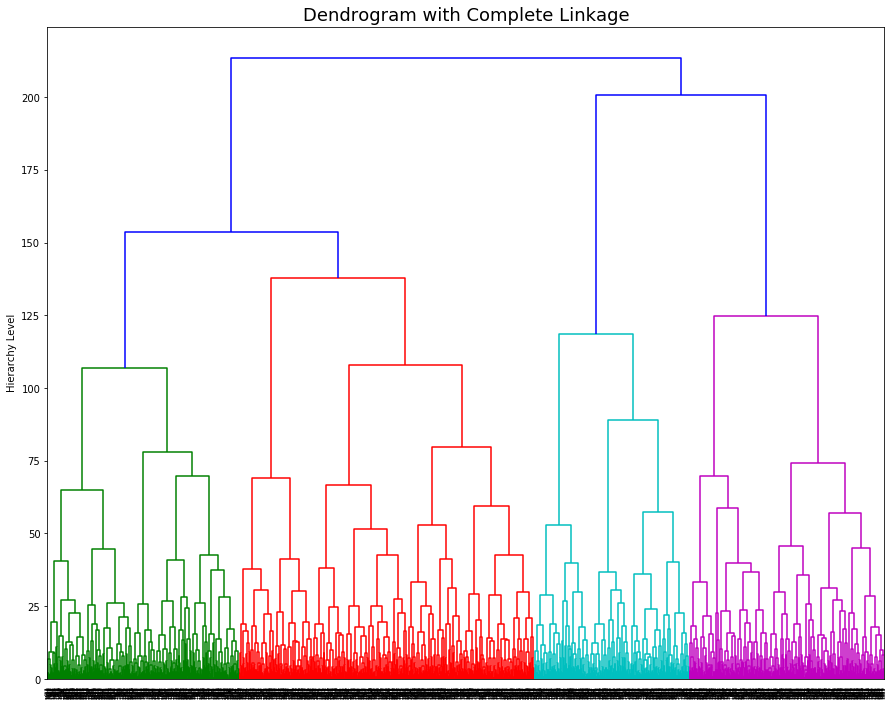

In [38]:
df = pd.DataFrame(results, columns=['1st_Comp', '2nd_Comp'])
dfsub = df.sample(n = 2000)
complete_link = linkage(dfsub, 'complete')
plt.figure(figsize=(15, 12))
dn_c = dendrogram(complete_link)
plt.title('Dendrogram with Complete Linkage', fontsize = 18)
plt.ylabel('Hierarchy Level')

The dendogram suggests that there should be only four clusters which is pecuilar considering we have ten numbers in our data range. We would hope to have ten different clusters. One of the limitations of the dendogram are when it has a numerous amounts of branches and connections. It can become difficult to follow.

Text(0, 0.5, 'Hierarchy Level')

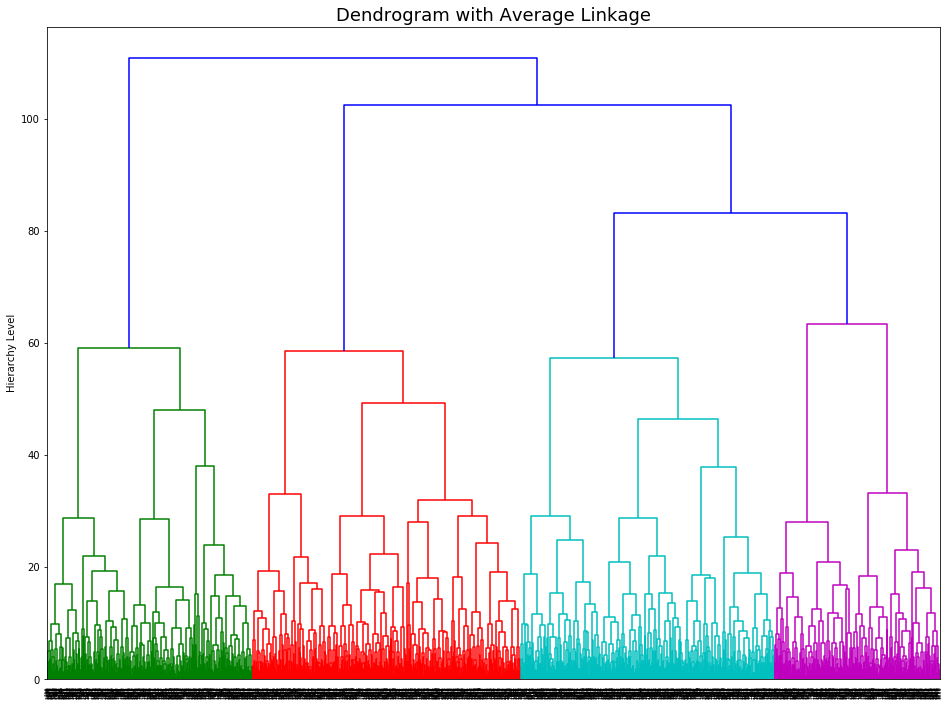

In [39]:
avg_link = linkage(dfsub, 'average')
plt.figure(figsize=(16, 12))
dn_a = dendrogram(avg_link)
plt.title('Dendrogram with Average Linkage', fontsize = 18)
plt.ylabel('Hierarchy Level')

Text(0, 0.5, 'Hierarchy Level')

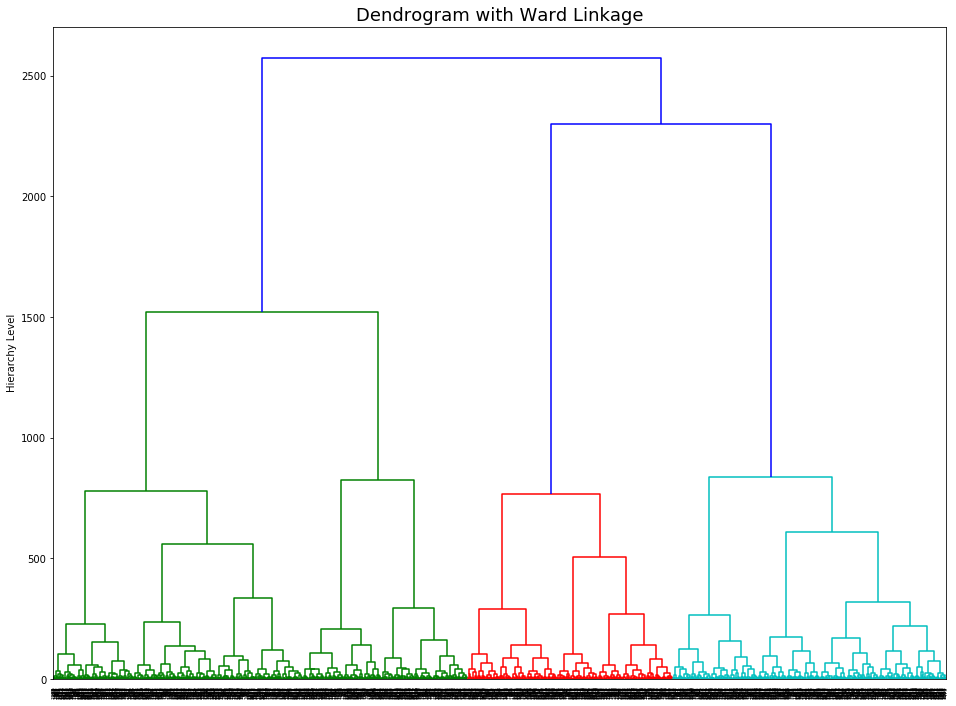

In [40]:
avg_link = linkage(dfsub, 'ward')
plt.figure(figsize=(16, 12))
dn_a = dendrogram(avg_link)
plt.title('Dendrogram with Ward Linkage', fontsize = 18)
plt.ylabel('Hierarchy Level')

Of the three linkage methods, Ward definitely made for the smoothest, most efficient clustering. You can tell looking at the others, that it takes many more branches to establish clusters when compared to Ward.